To explore the All State Insurrance Data

In [2]:
%matplotlib inline

In [41]:
import pandas as pd
import numpy as np
import os

# set working directory
os.chdir(r"H:\Tutorial\Kaggle Competitions\AllState")
print(os.getcwd())
files = os.listdir()
print(files)

# read in data in both training and test set
train = pd.read_csv("train.csv")
#test = pd.read_csv('test.csv')

print("dimension of the dataset", train.shape)
#print("description of the dataset\n", train.describe())
#print("What data look like\n", train.head(2))
#print(test.head(2))
#print(train.tail(2))
print("Need to find out if data is distributed evenly, close to 0 means evenly\n", train.skew())

# find all column names and see if there is any meaningful information available
print(train.columns.values)

# find the data types of all columns
allColumns = train.dtypes
#print(len(allColumns))
#print(allColumns)

columnGroups = train.columns.to_series().groupby(train.dtypes).groups
#print(columnGroups)

# select colmuns with data type as object (that is categorical)
train_cat_only = train.select_dtypes(include=[object])

# select columns with numeric data type
train_num_only = train.select_dtypes(exclude=[object])
ids = train_num_only['id']
train_num_only.drop(['id'], 1, inplace=True)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# need to convert all categorical data into numeric data
for cat in train.columns.values:
    if train[cat].dtype == 'object':
        train[cat] = le.fit_transform(train[cat])
        train[cat] = train[cat].astype(np.float32)
        
print(train.head(2))

H:\Tutorial\Kaggle Competitions\AllState
['sample_submission.csv', 'sample_submission.csv (1).zip', 'test.csv', 'test.csv.zip', 'train.csv', 'train.csv.zip']
dimension of the dataset (188318, 132)
Need to find out if data is distributed evenly, close to 0 means evenly
 id       -0.002155
cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64
['id' 'cat1' 'cat2' 'cat3' 'cat4' 'cat5' 'cat6' 'cat7' 'cat8' 'cat9'
 'cat10' 'cat11' 'cat12' 'cat13' 'cat14' 'cat15' 'cat16' 'cat17' 'cat18'
 'cat19' 'cat20' 'cat21' 'cat22' 'cat23' 'cat24' 'cat25' 'cat26' 'cat27'
 'cat28' 'cat29' 'cat30' 'cat31' 'cat32' 'cat33' 'cat34' 'cat35' 'cat36'
 'cat37' 'cat38' 'cat39' 'cat40' 'cat41' 'cat42' 'cat43' 'cat44' 'cat45'
 'cat46' 'cat47' 'cat48' 'cat49' 'cat50' 'cat51' '

C:\Users\ting\Anaconda3\lib\site-packages\ipykernel\__main__.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


   id  cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9   ...     \
0   1   0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   1.0   ...      
1   2   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   ...      

      cont6     cont7    cont8    cont9   cont10    cont11    cont12  \
0  0.718367  0.335060  0.30260  0.67135  0.83510  0.569745  0.594646   
1  0.438917  0.436585  0.60087  0.35127  0.43919  0.338312  0.366307   

     cont13    cont14     loss  
0  0.822493  0.714843  2213.18  
1  0.611431  0.304496  1283.60  

[2 rows x 132 columns]


Here, I try to find out the np.histogram for each categorical values (now numeric) and will draw the graphs (histogram) if it is not binary

In [54]:
import re
import matplotlib.pyplot as plt

# the pattern for regular expression
pat = re.compile(r'cat\d+', re.M|re.I)

#fg,ax = plt.subplots(nrows=1,ncols=60,figsize=(12, 8))

for col in train.columns.values:
    if re.match(pat, col):
        if len(set(train[col])) == 2:
            #print(col, " and ", list(range(len(set(train[col])))))
            #print(np.histogram(np.array(train[col]), bins=list(range(len(set(train[col])))))) 
            pass
        else:
            # draw graphs if the bins= > 2 (that is more than binary)
            #print(col)
            #plt.hist(train[col], bins=list(range(len(set(train[col])))))
            #plt.show()
            pass

            
        

plot categorical data

  cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10  ...   cat107 cat108  \
0    A    B    A    B    A    A    A    A    B     A  ...        J      G   
1    A    B    A    A    A    A    A    A    B     B  ...        K      K   

  cat109 cat110 cat111 cat112 cat113 cat114 cat115 cat116  
0     BU     BC      C     AS      S      A      O     LB  
1     BI     CQ      A     AV     BM      A      O     DP  

[2 rows x 116 columns]
Counter({'A': 141550, 'B': 46768})


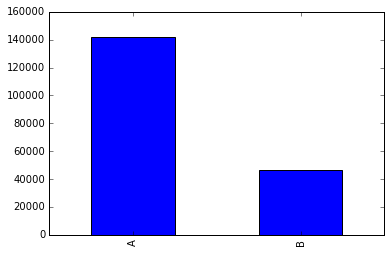

Counter({'A': 106721, 'B': 81597})


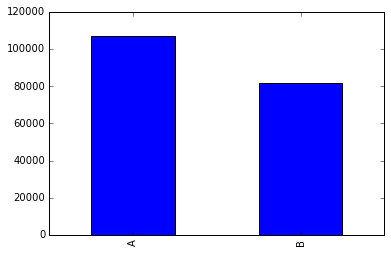

Counter({'A': 177993, 'B': 10325})


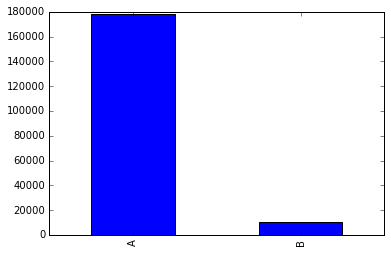

Counter({'A': 128395, 'B': 59923})


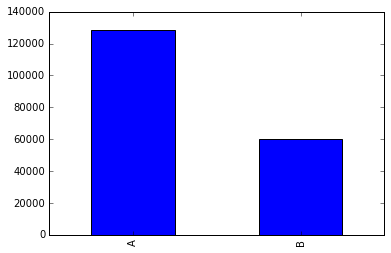

Counter({'A': 123737, 'B': 64581})


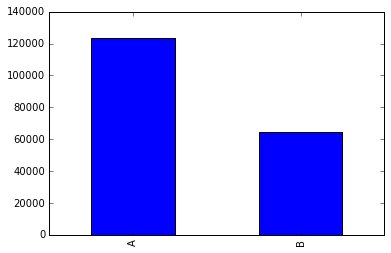

Counter({'A': 131693, 'B': 56625})


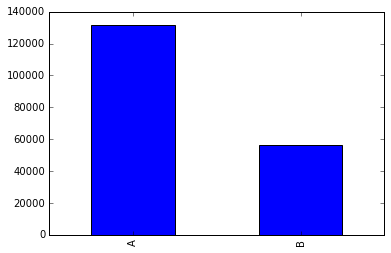

Counter({'A': 183744, 'B': 4574})


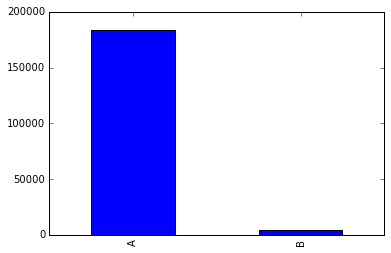

Counter({'A': 177274, 'B': 11044})


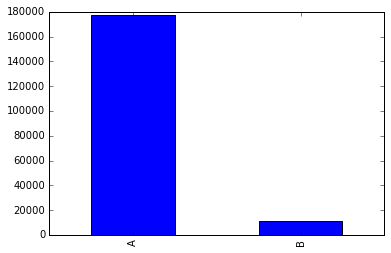

Counter({'A': 113122, 'B': 75196})


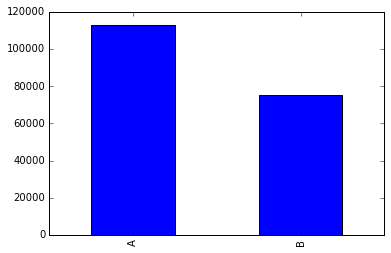

Counter({'A': 160213, 'B': 28105})


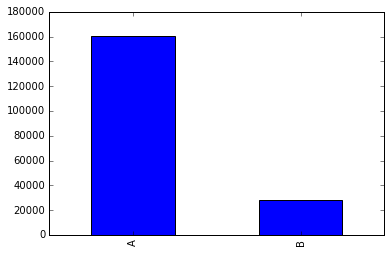

Counter({'A': 168186, 'B': 20132})


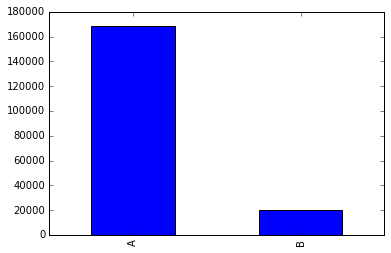

Counter({'A': 159825, 'B': 28493})


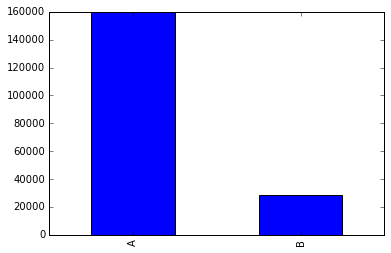

Counter({'A': 168851, 'B': 19467})


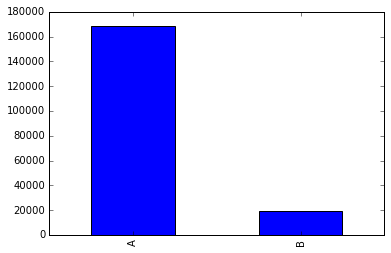

Counter({'A': 186041, 'B': 2277})


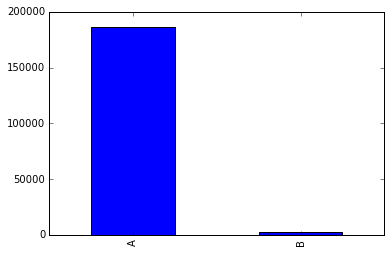

Counter({'A': 188284, 'B': 34})


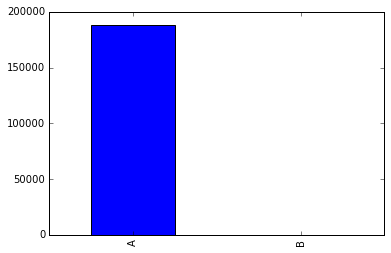

Counter({'A': 181843, 'B': 6475})


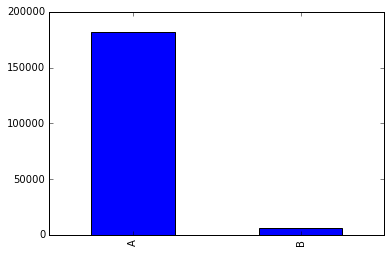

Counter({'A': 187009, 'B': 1309})


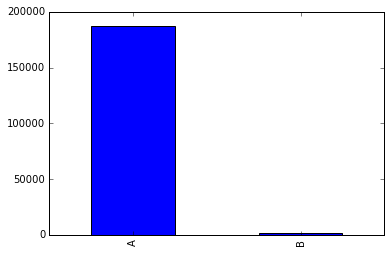

Counter({'A': 187331, 'B': 987})


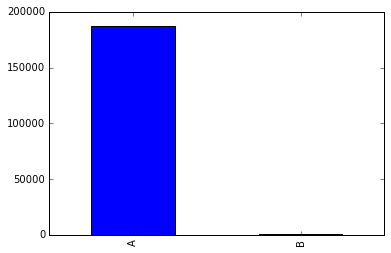

Counter({'A': 186510, 'B': 1808})


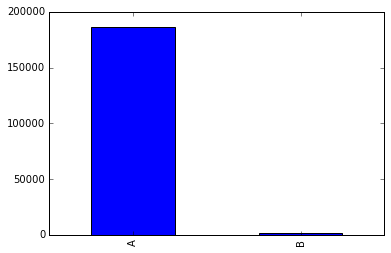

Counter({'A': 188114, 'B': 204})


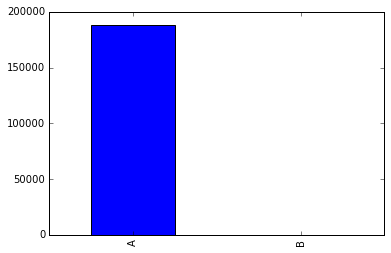

Counter({'A': 187905, 'B': 413})


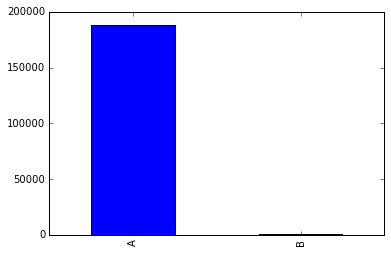

Counter({'A': 188275, 'B': 43})


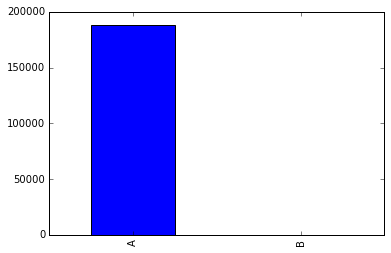

Counter({'A': 157445, 'B': 30873})


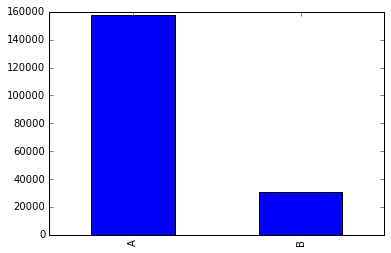

Counter({'A': 181977, 'B': 6341})


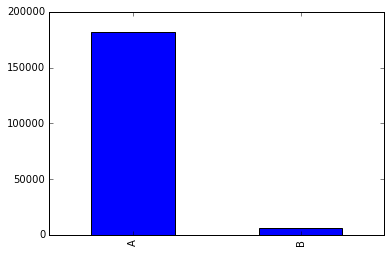

Counter({'A': 169969, 'B': 18349})


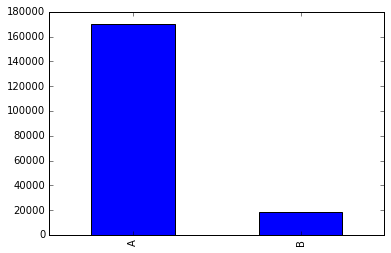

Counter({'A': 177119, 'B': 11199})


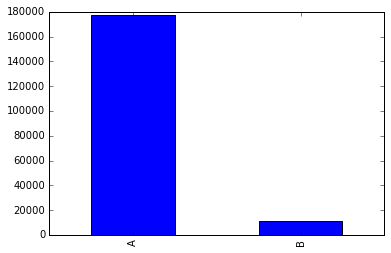

Counter({'A': 168250, 'B': 20068})


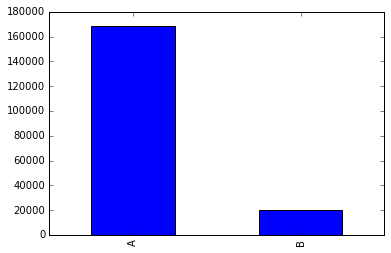

Counter({'A': 180938, 'B': 7380})


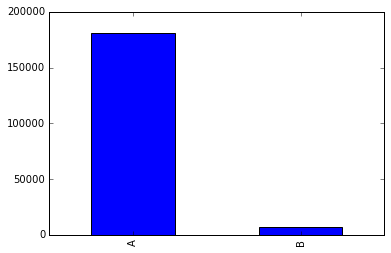

Counter({'A': 184593, 'B': 3725})


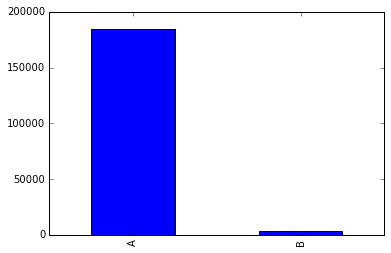

Counter({'A': 184760, 'B': 3558})


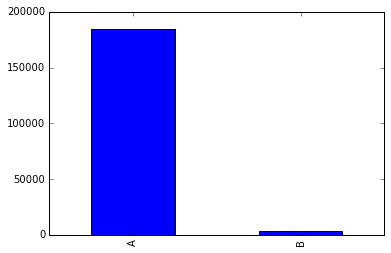

Counter({'A': 182980, 'B': 5338})


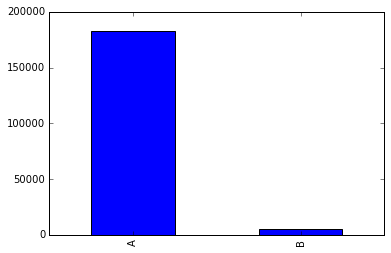

Counter({'A': 187107, 'B': 1211})


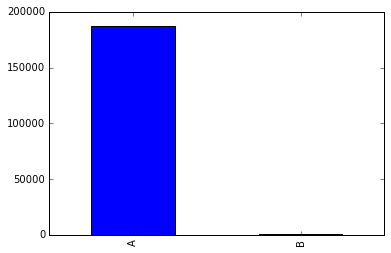

Counter({'A': 187361, 'B': 957})


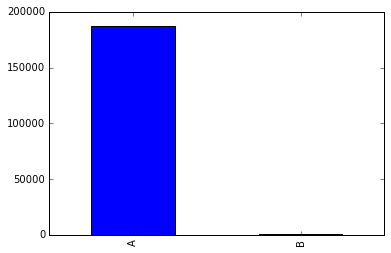

Counter({'A': 187734, 'B': 584})


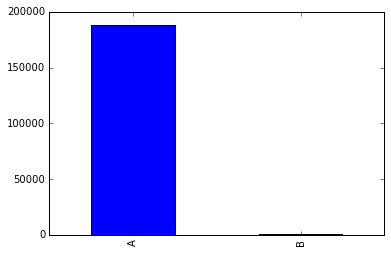

Counter({'A': 188105, 'B': 213})


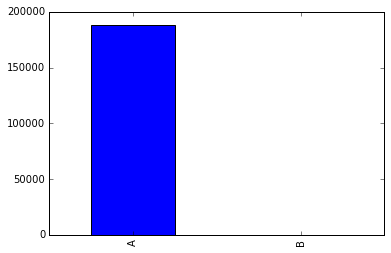

Counter({'A': 156313, 'B': 32005})


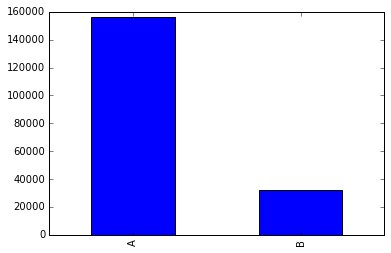

Counter({'A': 165729, 'B': 22589})


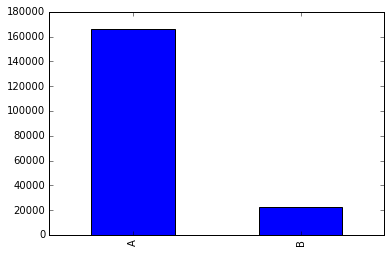

Counter({'A': 169323, 'B': 18995})


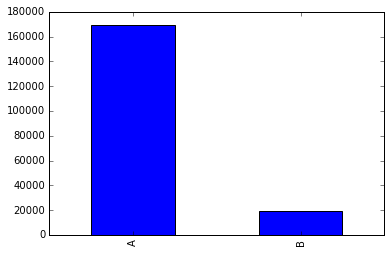

Counter({'A': 183393, 'B': 4925})


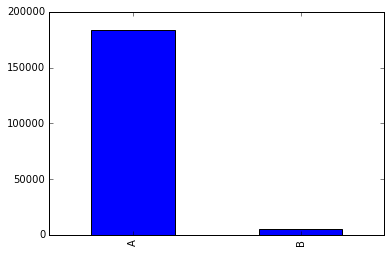

Counter({'A': 180119, 'B': 8199})


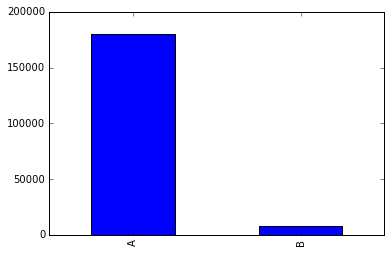

Counter({'A': 181177, 'B': 7141})


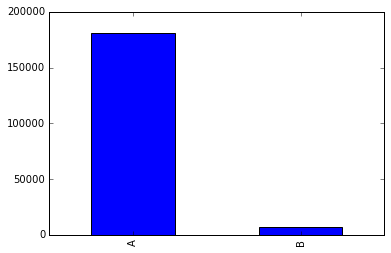

Counter({'A': 186623, 'B': 1695})


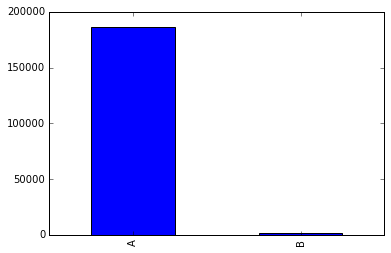

Counter({'A': 184110, 'B': 4208})


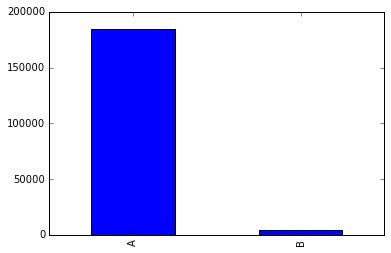

Counter({'A': 172716, 'B': 15602})


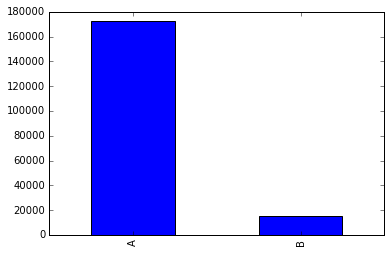

Counter({'A': 183991, 'B': 4327})


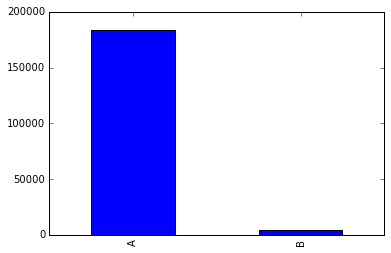

Counter({'A': 187436, 'B': 882})


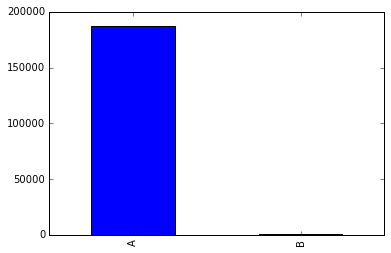

Counter({'A': 187617, 'B': 701})


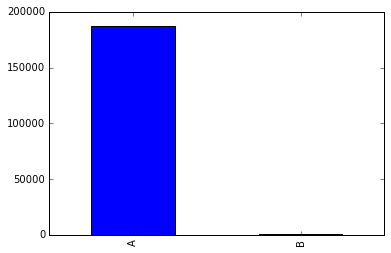

Counter({'A': 188049, 'B': 269})


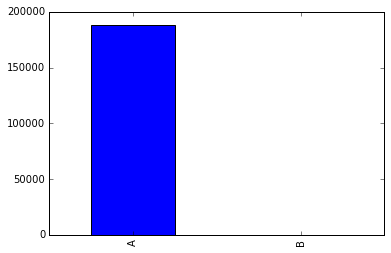

Counter({'A': 179127, 'B': 9191})


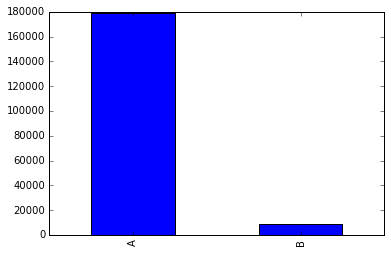

Counter({'A': 137611, 'B': 50707})


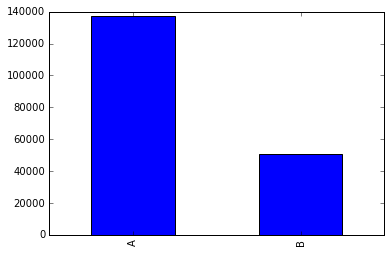

Counter({'A': 187071, 'B': 1247})


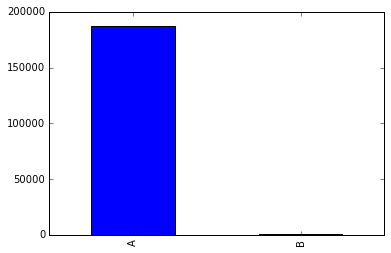

Counter({'A': 179505, 'B': 8813})


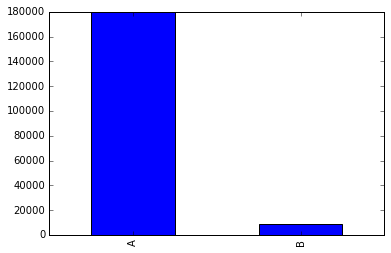

Counter({'A': 172949, 'B': 15369})


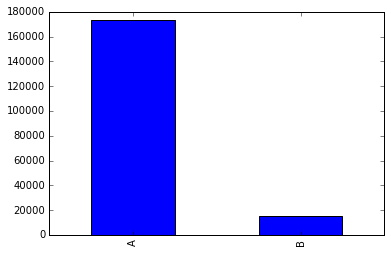

Counter({'A': 183762, 'B': 4556})


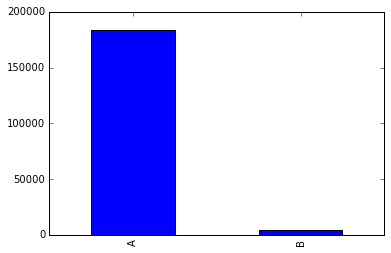

Counter({'A': 188173, 'B': 145})


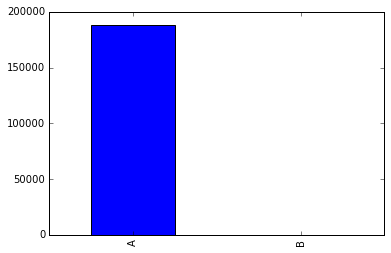

Counter({'A': 188136, 'B': 182})


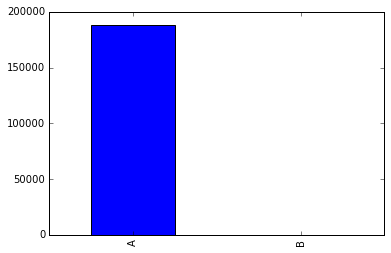

Counter({'A': 185296, 'B': 3022})


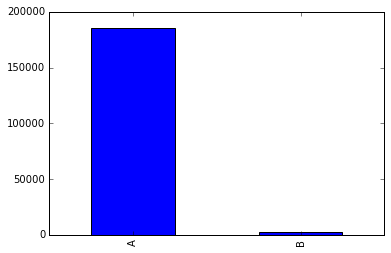

Counter({'A': 188079, 'B': 239})


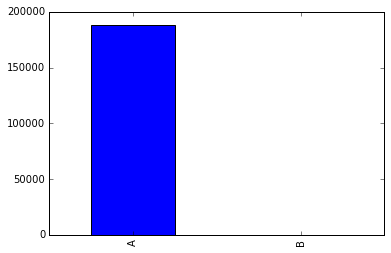

Counter({'A': 188018, 'B': 300})


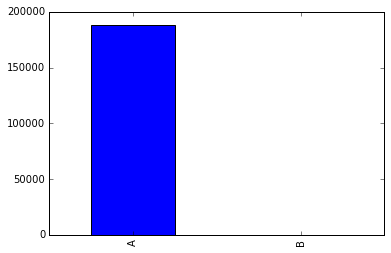

Counter({'A': 187872, 'B': 446})


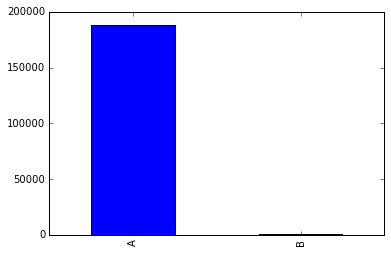

Counter({'A': 187596, 'B': 722})


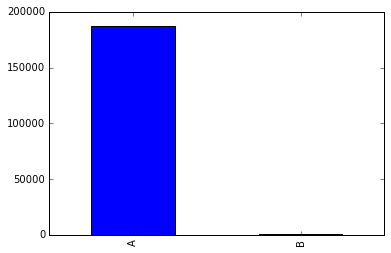

Counter({'A': 188273, 'B': 45})


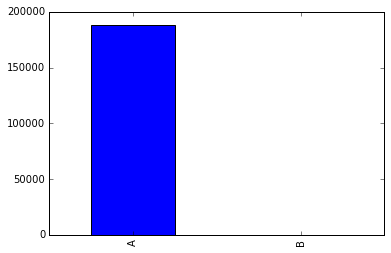

Counter({'A': 188239, 'B': 79})


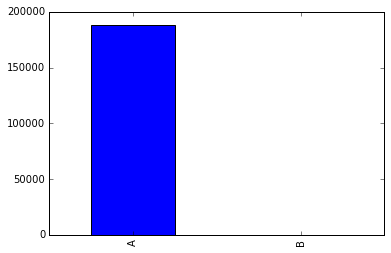

Counter({'A': 188271, 'B': 47})


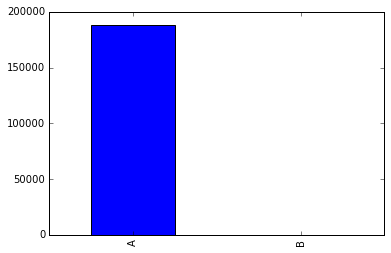

Counter({'A': 186056, 'B': 2262})


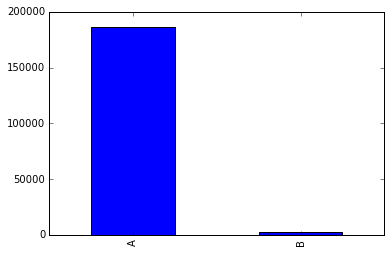

Counter({'A': 179982, 'B': 8336})


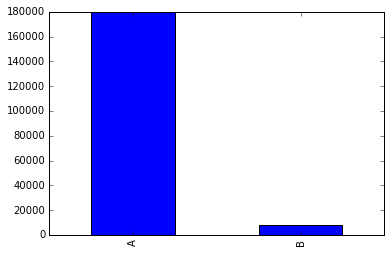

Counter({'A': 187626, 'B': 692})


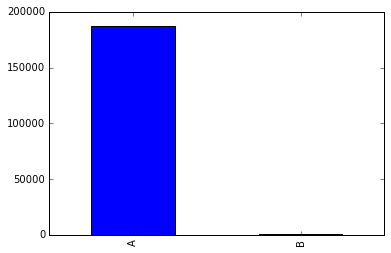

Counter({'A': 188176, 'B': 142})


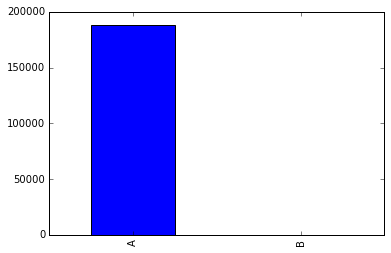

Counter({'A': 188011, 'B': 307})


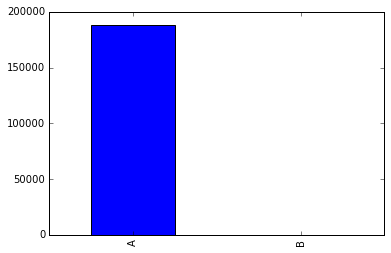

Counter({'A': 188295, 'B': 23})


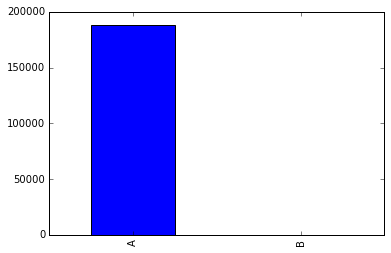

Counter({'A': 178646, 'B': 9672})


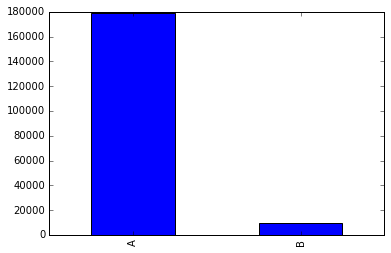

Counter({'A': 118322, 'B': 69996})


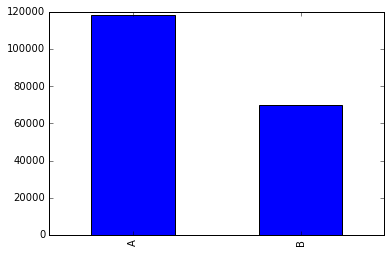

Counter({'A': 154275, 'B': 34017, 'C': 26})


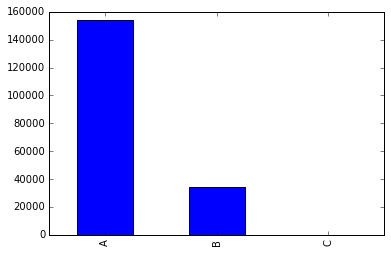

Counter({'A': 184731, 'B': 3561, 'C': 26})


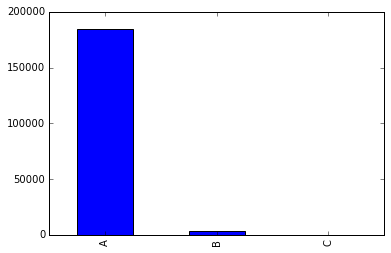

Counter({'A': 154307, 'B': 34010, 'C': 1})


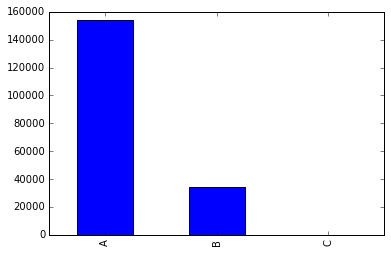

Counter({'A': 181347, 'B': 6183, 'C': 788})


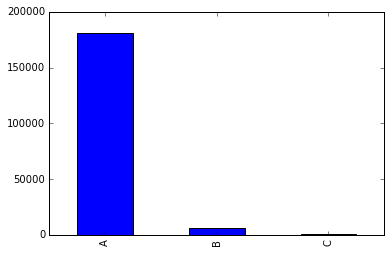

Counter({'D': 187503, 'C': 408, 'B': 358, 'A': 49})


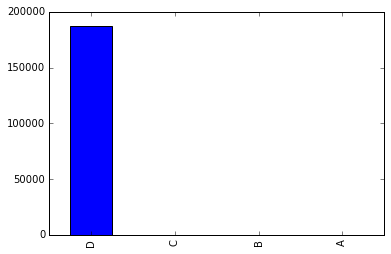

Counter({'B': 186526, 'A': 788, 'C': 645, 'D': 359})


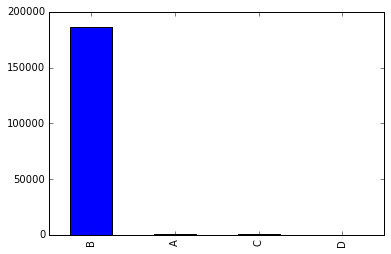

Counter({'B': 152929, 'D': 26657, 'A': 7064, 'C': 1668})


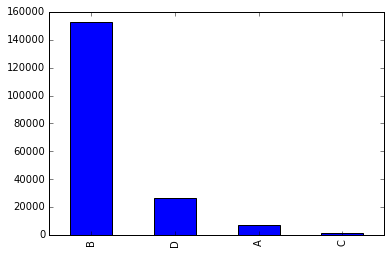

Counter({'D': 137505, 'B': 46538, 'C': 3492, 'A': 783})


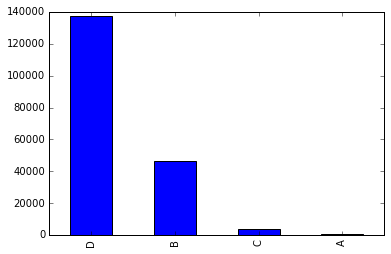

Counter({'D': 154385, 'B': 24132, 'C': 9013, 'A': 788})


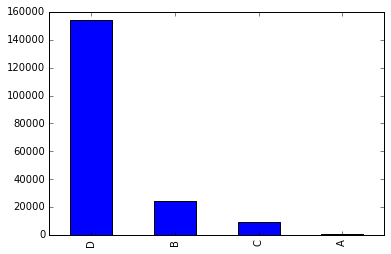

Counter({'B': 147536, 'A': 19322, 'D': 18805, 'C': 2655})


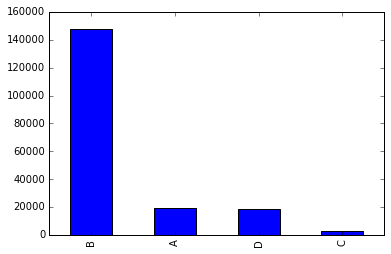

Counter({'B': 141534, 'A': 26038, 'D': 15788, 'C': 4958})


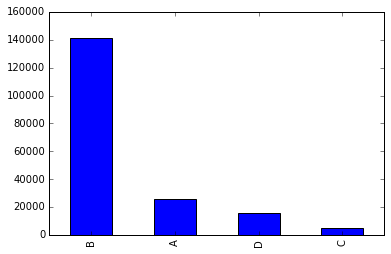

Counter({'C': 154939, 'A': 29450, 'D': 3498, 'B': 431})


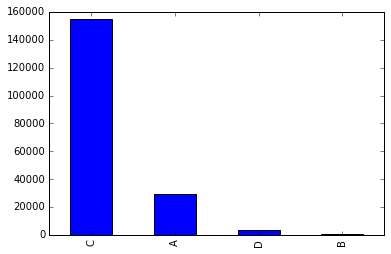

Counter({'B': 186005, 'C': 1011, 'A': 788, 'D': 514})


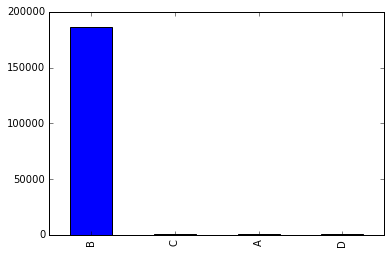

Counter({'B': 103852, 'D': 72587, 'C': 10290, 'A': 1589})


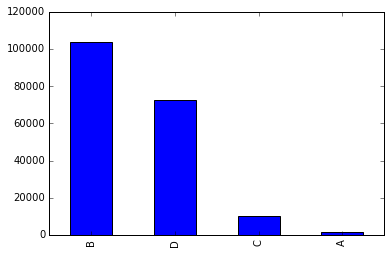

Counter({'B': 166992, 'D': 11719, 'C': 8819, 'A': 788})


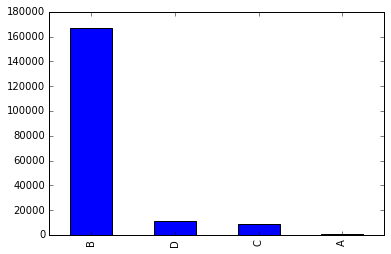

Counter({'A': 168926, 'D': 19302, 'E': 83, 'B': 7})


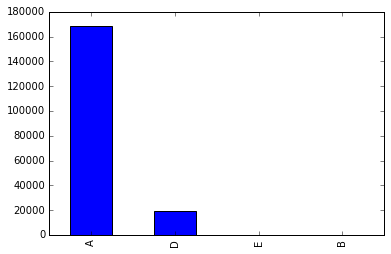

Counter({'A': 183744, 'B': 4312, 'C': 220, 'D': 33, 'E': 5, 'I': 2, 'G': 1, 'H': 1})


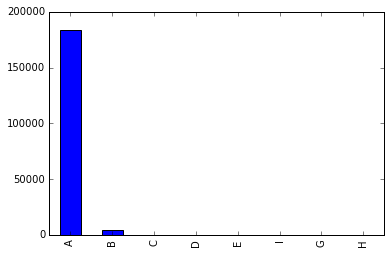

Counter({'A': 177993, 'B': 9515, 'C': 728, 'D': 70, 'E': 6, 'F': 4, 'G': 2})


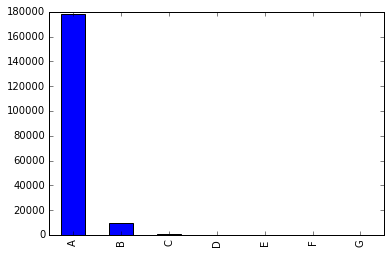

Counter({'A': 111028, 'B': 42630, 'G': 26734, 'C': 6400, 'D': 1149, 'E': 254, 'F': 97, 'H': 26})


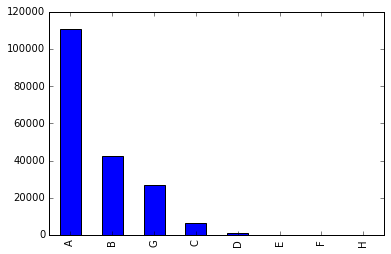

Counter({'A': 124689, 'H': 62901, 'B': 628, 'C': 62, 'I': 26, 'D': 11, 'F': 1})


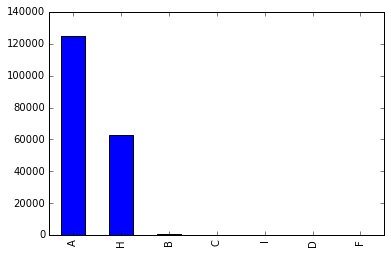

Counter({'D': 150237, 'C': 35788, 'B': 1133, 'E': 728, 'A': 432})


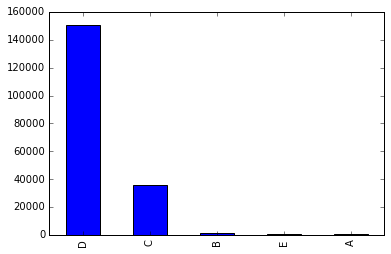

Counter({'D': 121642, 'B': 51710, 'C': 13623, 'A': 738, 'F': 494, 'E': 91, 'G': 20})


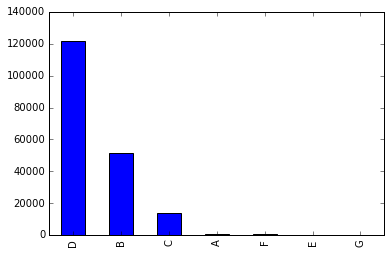

Counter({'C': 87531, 'D': 79525, 'E': 17417, 'A': 3736, 'B': 109})


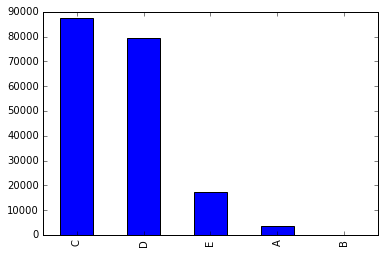

Counter({'E': 174360, 'D': 7922, 'B': 2957, 'G': 2665, 'F': 343, 'A': 35, 'C': 24, 'I': 12})


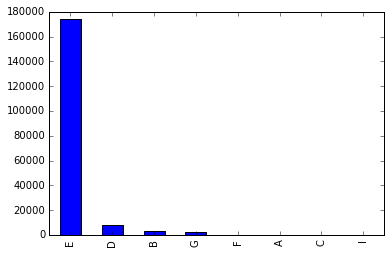

Counter({'C': 78127, 'E': 47450, 'A': 41970, 'G': 16745, 'D': 3779, 'F': 213, 'B': 34})


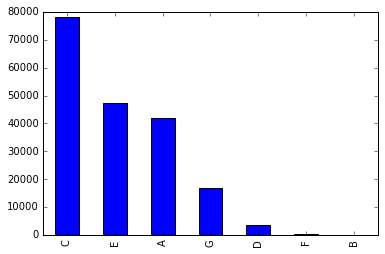

Counter({'A': 105492, 'D': 50557, 'C': 21485, 'E': 10242, 'B': 542})


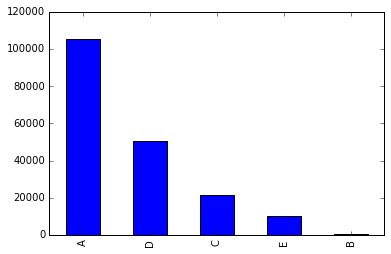

Counter({'P': 79455, 'T': 72591, 'R': 10290, 'D': 8844, 'S': 7045, 'N': 2894, 'K': 2703, 'F': 2702, 'E': 1034, 'C': 310, 'J': 245, 'H': 93, 'M': 52, 'I': 38, 'G': 19, 'O': 3})


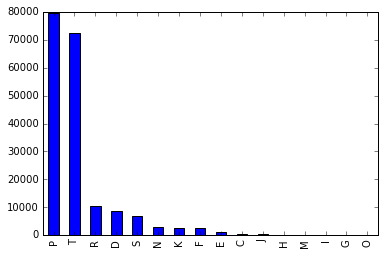

Counter({'F': 42970, 'I': 39933, 'L': 19961, 'K': 13817, 'G': 12935, 'J': 12027, 'H': 10776, 'A': 9402, 'N': 7592, 'B': 6608, 'O': 5697, 'M': 5185, 'C': 836, 'D': 553, 'E': 26})


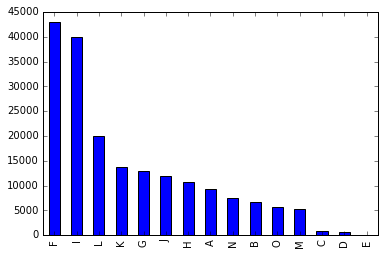

Counter({'A': 106721, 'D': 17171, 'C': 16971, 'G': 10944, 'F': 10139, 'J': 7259, 'I': 6690, 'M': 3669, 'L': 3173, 'Q': 2762, 'O': 2493, 'S': 173, 'R': 138, 'E': 7, 'B': 3, 'K': 2, 'U': 1, 'H': 1, 'N': 1})


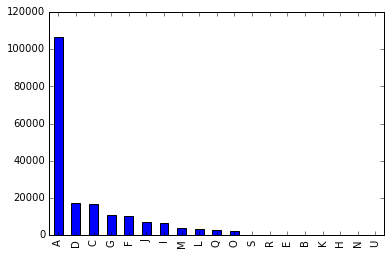

Counter({'A': 177274, 'B': 5155, 'C': 4929, 'E': 482, 'D': 449, 'G': 15, 'F': 12, 'H': 1, 'J': 1})


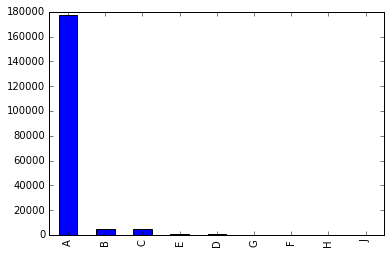

Counter({'A': 123737, 'B': 33342, 'C': 16508, 'D': 7806, 'E': 4473, 'F': 1528, 'G': 550, 'H': 190, 'I': 109, 'J': 45, 'L': 17, 'K': 11, 'N': 2})


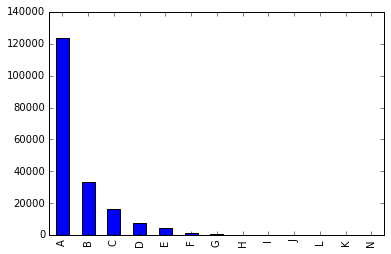

Counter({'E': 42925, 'G': 40660, 'D': 27611, 'F': 19228, 'H': 17187, 'K': 14297, 'I': 10919, 'C': 6949, 'L': 3486, 'J': 3138, 'M': 1156, 'O': 409, 'N': 153, 'P': 86, 'A': 68, 'B': 43, 'Q': 3})


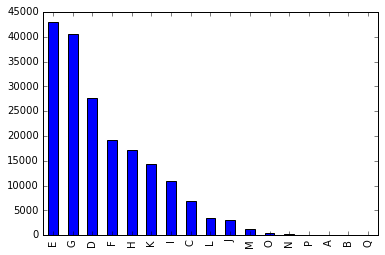

Counter({'E': 76493, 'F': 62892, 'G': 20613, 'D': 12172, 'H': 11258, 'I': 2941, 'J': 694, 'K': 486, 'C': 275, 'M': 171, 'L': 145, 'A': 77, 'N': 64, 'P': 15, 'O': 9, 'B': 5, 'Q': 4, 'R': 2, 'T': 1, 'S': 1})


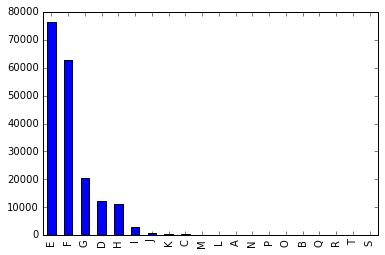

Counter({'G': 47165, 'H': 37713, 'F': 36143, 'I': 21433, 'J': 18281, 'E': 13000, 'K': 7958, 'L': 2971, 'D': 1934, 'M': 1176, 'N': 231, 'C': 129, 'A': 75, 'O': 66, 'R': 32, 'B': 9, 'P': 2})


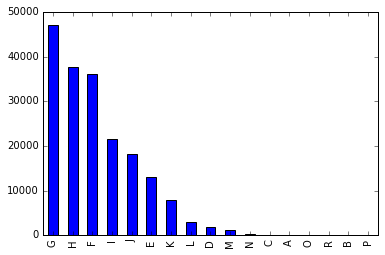

Counter({'F': 47310, 'G': 28560, 'H': 23461, 'J': 22405, 'K': 20236, 'I': 20066, 'E': 12521, 'L': 6976, 'D': 3225, 'M': 2067, 'N': 797, 'C': 213, 'Q': 140, 'O': 125, 'P': 100, 'A': 75, 'U': 32, 'R': 5, 'B': 2, 'S': 2})


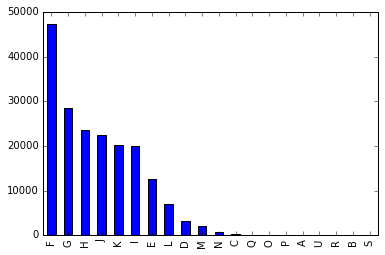

Counter({'B': 65512, 'K': 42435, 'G': 21421, 'D': 19160, 'F': 10242, 'A': 9299, 'E': 7968, 'I': 7243, 'H': 4305, 'C': 520, 'J': 213})


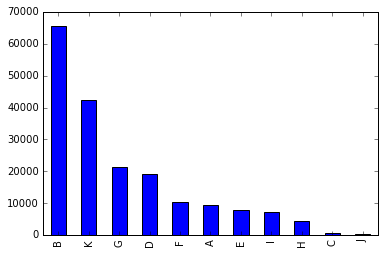

Counter({'BI': 152918, 'AB': 21933, 'BU': 3142, 'K': 2999, 'G': 1353, 'BQ': 1067, 'N': 461, 'M': 446, 'BO': 329, 'BH': 257, 'D': 214, 'AR': 208, 'AT': 200, 'CL': 178, 'AS': 159, 'AL': 151, 'R': 149, 'CD': 143, 'F': 124, 'BL': 122, 'CI': 109, 'I': 94, 'L': 89, 'U': 78, 'AW': 74, 'H': 73, 'CA': 66, 'Q': 66, 'BX': 61, 'T': 59, 'O': 58, 'AQ': 57, 'AH': 55, 'AX': 54, 'AE': 52, 'AM': 52, 'A': 52, 'AJ': 50, 'X': 49, 'CC': 43, 'BD': 43, 'C': 39, 'BA': 33, 'S': 25, 'Y': 23, 'BJ': 22, 'AU': 22, 'AI': 18, 'AN': 17, 'E': 17, 'BR': 16, 'BK': 15, 'BB': 14, 'AA': 14, 'BC': 14, 'CK': 13, 'CF': 12, 'V': 11, 'BS': 9, 'AY': 9, 'AF': 8, 'CG': 8, 'CJ': 8, 'CE': 8, 'P': 8, 'AP': 7, 'CH': 6, 'AV': 6, 'BE': 5, 'BG': 3, 'BY': 3, 'AO': 2, 'BV': 2, 'BT': 2, 'BM': 2, 'BN': 2, 'J': 1, 'BF': 1, 'AG': 1, 'ZZ': 1, 'BP': 1, 'AK': 1, 'B': 1, 'CB': 1})


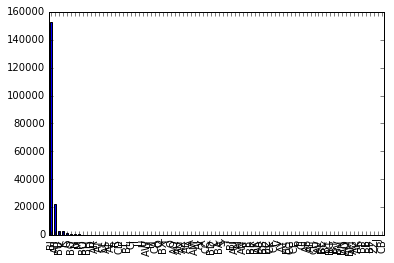

Counter({'CL': 25305, 'EG': 24654, 'CS': 24592, 'EB': 21396, 'CO': 17495, 'BT': 16365, 'EL': 9236, 'BC': 4131, 'DW': 3640, 'CQ': 3271, 'DX': 3096, 'AI': 2965, 'BP': 2867, 'W': 2703, 'C': 2681, 'AC': 2611, 'CM': 1925, 'BS': 1920, 'DK': 1745, 'V': 1692, 'A': 1296, 'EE': 1185, 'EF': 1159, 'CI': 1066, 'DM': 796, 'CR': 767, 'AM': 643, 'AD': 626, 'AP': 576, 'T': 529, 'DL': 395, 'U': 343, 'AK': 336, 'CH': 296, 'I': 236, 'DJ': 233, 'N': 222, 'CG': 206, 'AY': 202, 'EA': 181, 'EM': 176, 'E': 175, 'CJ': 153, 'BG': 146, 'DU': 138, 'AL': 121, 'DH': 120, 'O': 104, 'AR': 90, 'CV': 72, 'CN': 70, 'X': 66, 'DI': 62, 'BA': 61, 'AB': 56, 'BR': 52, 'D': 52, 'AW': 48, 'AT': 39, 'CT': 39, 'BO': 38, 'AU': 38, 'CF': 35, 'G': 34, 'BX': 31, 'DC': 29, 'AO': 27, 'CP': 27, 'BJ': 26, 'CK': 26, 'DR': 26, 'J': 22, 'DA': 22, 'AX': 21, 'BW': 21, 'R': 20, 'AA': 20, 'DF': 20, 'K': 20, 'BF': 19, 'BQ': 19, 'BL': 18, 'DS': 17, 'DQ': 17, 'AE': 16, 'DG': 15, 'P': 15, 'BE': 15, 'DY': 14, 'AJ': 14, 'DE': 14, 'DP': 13, 'DO': 12, 

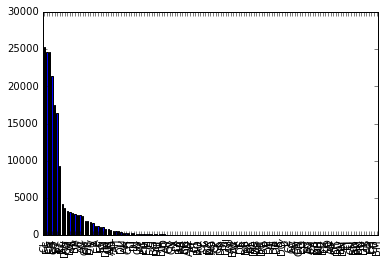

Counter({'A': 128395, 'C': 32401, 'E': 14682, 'G': 7039, 'I': 3578, 'K': 1353, 'M': 473, 'O': 221, 'Q': 91, 'S': 38, 'U': 16, 'W': 16, 'B': 7, 'F': 3, 'D': 3, 'Y': 2})


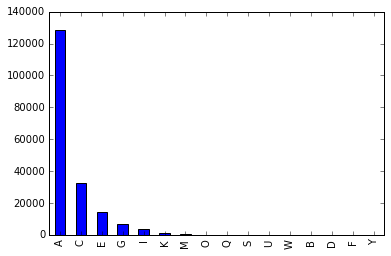

Counter({'E': 25148, 'AH': 18639, 'AS': 17669, 'J': 16222, 'AF': 9368, 'AN': 9138, 'N': 8453, 'U': 8356, 'AV': 7122, 'AK': 6726, 'K': 6059, 'AI': 4749, 'S': 4201, 'AP': 4000, 'G': 3168, 'F': 3149, 'AW': 3145, 'A': 2411, 'AR': 2365, 'C': 2257, 'O': 2183, 'D': 1645, 'AD': 1531, 'AY': 1414, 'Y': 1351, 'AG': 1331, 'AT': 1272, 'AA': 1241, 'AM': 1170, 'AL': 1130, 'R': 1123, 'AX': 1074, 'I': 940, 'X': 925, 'AE': 834, 'Q': 793, 'V': 693, 'H': 548, 'AO': 534, 'T': 521, 'L': 493, 'W': 461, 'AC': 454, 'M': 439, 'AU': 434, 'B': 423, 'P': 406, 'AB': 246, 'BA': 190, 'AJ': 144, 'AQ': 30})


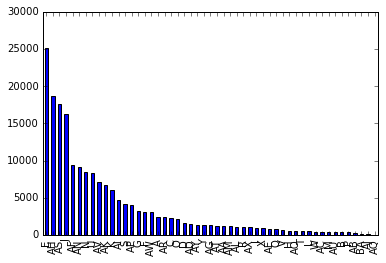

Counter({'BM': 26191, 'AE': 22030, 'L': 13058, 'AX': 12661, 'Y': 11374, 'K': 7738, 'S': 7033, 'X': 7016, 'AF': 6079, 'AN': 5214, 'H': 5094, 'AT': 4664, 'AJ': 4425, 'AD': 4419, 'AS': 3901, 'AK': 3520, 'BN': 3486, 'I': 3279, 'A': 3269, 'J': 3105, 'N': 2839, 'BC': 2793, 'Q': 2784, 'BJ': 2605, 'M': 2485, 'AG': 2415, 'AW': 1825, 'BG': 1804, 'AU': 1630, 'AO': 1628, 'F': 1463, 'BO': 1413, 'BH': 1221, 'BK': 693, 'AV': 528, 'AY': 466, 'AM': 450, 'AI': 440, 'BF': 347, 'BD': 337, 'AH': 209, 'C': 143, 'BB': 53, 'BA': 42, 'BI': 32, 'AB': 18, 'G': 18, 'AQ': 17, 'V': 15, 'U': 11, 'O': 10, 'E': 7, 'AP': 6, 'BE': 3, 'BL': 3, 'AL': 3, 'T': 2, 'AC': 1, 'B': 1, 'AR': 1, 'P': 1})


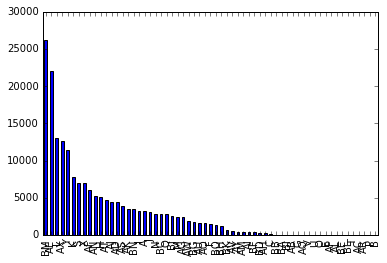

Counter({'A': 131693, 'C': 16793, 'E': 16475, 'J': 8199, 'F': 7905, 'N': 2455, 'I': 2432, 'R': 912, 'L': 870, 'U': 250, 'O': 240, 'Q': 43, 'V': 33, 'B': 6, 'D': 5, 'S': 4, 'X': 1, 'G': 1, 'W': 1})


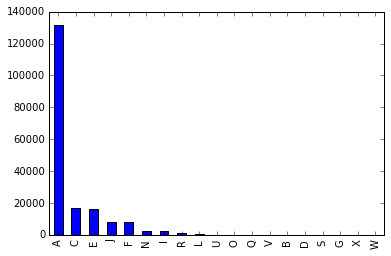

Counter({'K': 43866, 'O': 26813, 'J': 23895, 'N': 22438, 'P': 21538, 'L': 16125, 'M': 12444, 'Q': 8258, 'I': 7090, 'H': 2793, 'R': 2038, 'G': 315, 'F': 269, 'S': 250, 'A': 75, 'T': 56, 'U': 26, 'E': 11, 'W': 6, 'X': 5, 'D': 4, 'B': 2, 'C': 1})


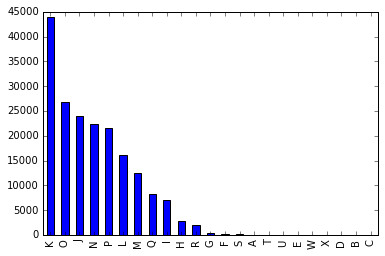

Counter({'HK': 21061, 'DJ': 20244, 'CK': 10162, 'DP': 9202, 'GS': 8736, 'CR': 6862, 'HX': 5629, 'DC': 4557, 'HG': 4414, 'IE': 4225, 'HQ': 4044, 'HV': 3853, 'GC': 3803, 'LM': 3277, 'LB': 3194, 'LN': 3127, 'KW': 3085, 'HJ': 2741, 'GK': 2632, 'DF': 2519, 'IG': 2269, 'LO': 2082, 'HB': 2007, 'MD': 1960, 'CB': 1909, 'LF': 1873, 'GI': 1835, 'BY': 1620, 'KC': 1513, 'GE': 1399, 'LY': 1327, 'CI': 1314, 'HN': 1302, 'IH': 1168, 'JR': 1013, 'HA': 975, 'CS': 934, 'HC': 810, 'FR': 789, 'HM': 764, 'EC': 708, 'IC': 708, 'MJ': 701, 'CW': 699, 'DK': 684, 'EK': 639, 'LW': 635, 'FB': 619, 'IF': 617, 'KA': 613, 'HL': 607, 'HH': 597, 'GX': 595, 'GU': 591, 'LQ': 589, 'DS': 553, 'GN': 536, 'KR': 519, 'FC': 502, 'GA': 495, 'FH': 479, 'DH': 454, 'DI': 448, 'EL': 445, 'EO': 438, 'CU': 438, 'GT': 403, 'JW': 390, 'LJ': 389, 'KB': 363, 'MG': 357, 'EA': 357, 'MC': 343, 'CP': 343, 'FT': 340, 'LX': 340, 'IT': 336, 'BX': 312, 'CD': 300, 'LV': 298, 'LC': 295, 'BD': 290, 'ME': 290, 'BV': 290, 'FD': 284, 'KL': 280, 'BP': 2

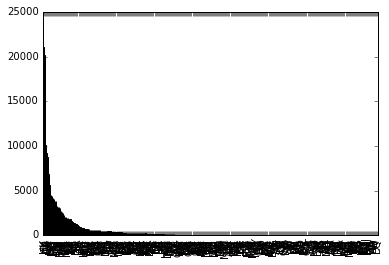

In [52]:
import matplotlib.pyplot as plt
from collections import Counter

print(train_cat_only.head(2))
col_names = train_cat_only.columns.values
for col in col_names:
    print(Counter(train_cat_only[col]))
    train_cat_only[col].value_counts().plot(kind='bar')
    plt.show()

Need to find out the relationship (correlation) among all variables

In [68]:
#print(train_num_only.head(2))
#print(train_cat_only.head(2))

# calculate correlation coefficients for all pairs of the data.frame
train_correlations = train_num_only.corr()
#print(train_correlations)
cols = train_num_only.columns.values

# as high correlation features could be removed to improve the performance
# we might like to find out who are highly correlated!
for col in cols:
    corrList = train_correlations[(train_correlations[col] > 0.5) &                                   
                                  (train_correlations[col] < 1)][col]
    if len(corrList) > 0:
        print(col)
        print(corrList)
            


cont1
cont6     0.758315
cont9     0.929912
cont10    0.808551
cont11    0.596090
cont12    0.614225
cont13    0.534850
Name: cont1, dtype: float64
cont4
cont8    0.52874
Name: cont4, dtype: float64
cont6
cont1     0.758315
cont7     0.658918
cont9     0.797544
cont10    0.883351
cont11    0.773745
cont12    0.785144
cont13    0.815091
Name: cont6, dtype: float64
cont7
cont6     0.658918
cont11    0.747108
cont12    0.742712
Name: cont7, dtype: float64
cont8
cont4    0.52874
Name: cont8, dtype: float64
cont9
cont1     0.929912
cont6     0.797544
cont10    0.785697
cont11    0.608000
cont12    0.626656
cont13    0.642028
Name: cont9, dtype: float64
cont10
cont1     0.808551
cont6     0.883351
cont9     0.785697
cont11    0.702896
cont12    0.713812
cont13    0.707876
Name: cont10, dtype: float64
cont11
cont1     0.596090
cont6     0.773745
cont7     0.747108
cont9     0.608000
cont10    0.702896
cont12    0.994384
Name: cont11, dtype: float64
cont12
cont1     0.614225
cont6     0.785144

In [33]:
# combine both train and test dataset
combined = train.append(test)
print(combined.shape)

from sklearn.feature_extraction import DictVectorizer
# 1h-vectorize categories
# vec = DictVectorizer()
#g = train_cat_only.copy()
#vec_num = vec.fit_transform(g.to_dict('records')).toarray()
#print(vec_num[2:3,1:-1])

subvec = train_cat_only.ix[2:5, 1:5]
print(subvec.to_dict('records'))
print(subvec)
vec = DictVectorizer()
vec_num=vec.fit_transform(subvec.to_dict('records')).toarray()
print(vec_num)

(313864, 132)
[{'cat4': 'A', 'cat3': 'A', 'cat5': 'B', 'cat2': 'B'}, {'cat4': 'B', 'cat3': 'A', 'cat5': 'A', 'cat2': 'B'}, {'cat4': 'B', 'cat3': 'A', 'cat5': 'A', 'cat2': 'B'}, {'cat4': 'A', 'cat3': 'A', 'cat5': 'A', 'cat2': 'B'}]
  cat2 cat3 cat4 cat5
2    B    A    A    B
3    B    A    B    A
4    B    A    B    A
5    B    A    A    A
[[ 1.  1.  1.  0.  0.  1.]
 [ 1.  1.  0.  1.  1.  0.]
 [ 1.  1.  0.  1.  1.  0.]
 [ 1.  1.  1.  0.  1.  0.]]


In [31]:
#create a dummy frame
df = pd.DataFrame({'factor':['a','a','a','b','c','c','c'], 'factor1':['d','a','d','b','c','d','c'], 'num':range(1,8)})
print(df)

#transpose the dataframe and get the inner dict from to_dict()
feats =df.T.to_dict().values()

from sklearn.feature_extraction import DictVectorizer
Dvec = DictVectorizer()
Dvec.fit_transform(feats).toarray()

  factor factor1  num
0      a       d    1
1      a       a    2
2      a       d    3
3      b       b    4
4      c       c    5
5      c       d    6
6      c       c    7


array([[ 0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  1.,  0.,  0.,  2.],
       [ 0.,  0.,  0.,  1.,  1.,  0.,  0.,  3.],
       [ 0.,  1.,  0.,  0.,  0.,  1.,  0.,  4.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  1.,  5.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  1.,  6.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  1.,  7.]])